In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_excel('manufacturing_emails_temporal_network.xlsx')
G = nx.Graph()

for index, row in df.iterrows():
    G.add_edge(row['node1'], row['node2'])

In [3]:
N = G.number_of_nodes()
E = G.number_of_edges()
p = 2*E/(N*(N-1))
#alt nx.density(G)
A = nx.to_numpy_matrix(G)
d = np.sum(A,0)
ED = np.average(d)
# alt ED = 2*E/(N)
# alt ED = np.sum(d)/N
VD = np.var(d)

print("Number of nodes:\t" + str(N))
print("Number of edges:\t" + str(E))
print('Network density:\t' + str(p))
print('Average degree:\t\t' + str(ED))
print("Degree variance:\t" + str(VD))

Number of nodes:	167
Number of edges:	3250
Network density:	0.2344708174013419
Average degree:		38.92215568862275
Degree variance:	993.8442396643837


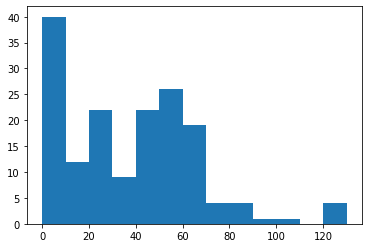

This network is best modelled by scale-free networks. Because a very few nodes dominate the network.


In [31]:
d = np.squeeze(np.asarray(d.astype(int)))

array_bins = np.arange(0,140,10)
plt.hist(d, bins=array_bins)
plt.show()

print("This network is best modelled by scale-free networks. Because a very few nodes dominate the network.")

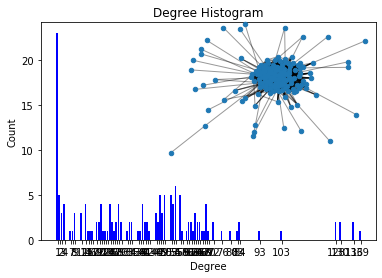